In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sns

path = 'Calibri.ttf'
font_manager.fontManager.addfont(path)
prop = font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams.update({'font.size': 20})
df = pd.read_csv('data.csv')

In [2]:
def triangular(data, noise_min=-1, noise_max=1, noise_mode=0):
    noisy_data = []
    for x in data:
        temp = round(x + random.triangular(noise_min, noise_mode, noise_max), 2)
        while temp < 0 or temp > 1:
            temp = round(x + random.triangular(noise_min, noise_mode, noise_max), 2)

        noisy_data.append(temp)
    return noisy_data


def gauss_noise(data, noise_std):
    data_length = len(data)
    exponential_factor = np.exp(-np.arange(data_length)/data_length)
    noisy_data = []
    for x, f in zip(data, exponential_factor):
        temp = round(x + f * random.gauss(0, noise_std), 2)
        while temp < 0:
            temp = round(x + random.gauss(0, noise_std), 2)
        noisy_data.append(temp)
    return noisy_data

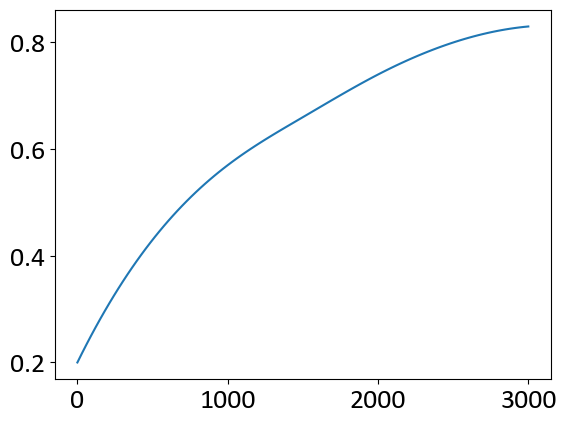

In [31]:
x = np.array([0, 1, 2, 3, 4, 5, 6]) * 500

y = np.array([0.2, 0.43, 0.57, 0.66, 0.74, 0.8, 0.83])

f = interp1d(x, y, kind='cubic')
x_new = np.linspace(0, 2999, 100)
y_new = f(x_new)

plt.plot(x_new, y_new)
plt.show()


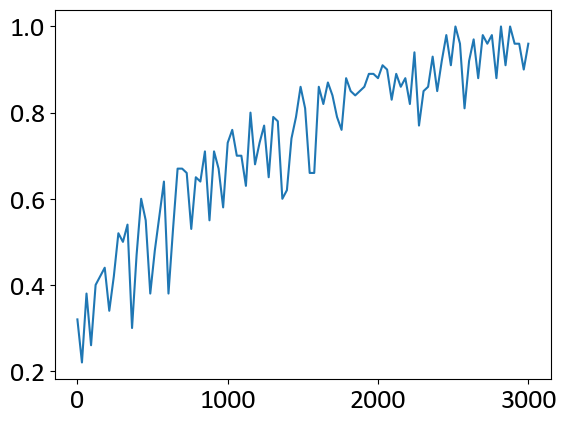

In [32]:
y_new_r = triangular(y_new, noise_min=-0.1, noise_max=0.2, noise_mode=0.2)
plt.plot(x_new, y_new_r)
plt.show()

In [33]:
ys = []
for i in range(5):
    y_new_r = triangular(y_new, noise_min=-0.2, noise_max=0.4, noise_mode=0.1)
    ys.append(y_new_r)

ys = np.array(ys)

In [34]:
x_stage_1 = x_new.copy()
y_stage_1 = ys.copy()

(100, 5)
(100, 5)


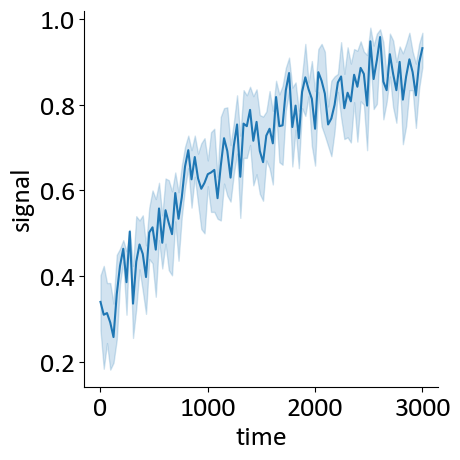

In [35]:
x = x_stage_1
data = y_stage_1.T

print(data.shape)

x_array = x
for i in range(4):
    x_array = np.column_stack((x_array, x))
print(x_array.shape)

# 将 time 和 signal 平铺为两列数据，且一一对应
x_array = x_array.flatten()  # (630,)
data = data.flatten()  # (630,)
data = np.column_stack((x_array, data))  # (630,2)
df = pd.DataFrame(data, columns=['time', 'signal'])


sns.relplot(x='time', y='signal', data=df, kind='line')
plt.show()

In [36]:
x_stage_1 = x_new.copy()
y_stage_1 = ys.copy()
print(x_stage_1.shape)
print(y_stage_1.shape)

(100,)
(5, 100)


In [37]:
x_stage_2 = np.arange(3000, 4000, 20)  # (34, )
y_stage_2 = np.empty((5, x_stage_2.shape[0]))

for i in range(y_stage_1.shape[0]):
    y_stage_2[i] = np.full(x_stage_2.shape, y_stage_1[i][-1])

In [38]:
x_stage_3 = np.arange(4000, 5000, 20)  # (34, )
y_stage_3 = np.empty((5, x_stage_3.shape[0]))

for i in range(y_stage_1.shape[0]):
    y_stage_3[i] = triangular(y_stage_2[i], noise_min=-0.05, noise_max=0.2, noise_mode=0.1)

In [39]:
x = np.concatenate((x_stage_1, x_stage_2, x_stage_3))

y = np.empty((5, x.shape[0]))
for i in range(5):
    y[i] = np.concatenate((y_stage_1[i], y_stage_2[i], y_stage_3[i]))

(200,)
(200, 5)


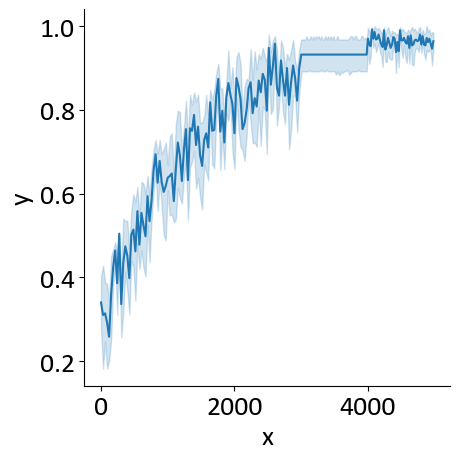

In [40]:
data = y.T

print(x.shape)

x_array = x
for i in range(4):
    x_array = np.column_stack((x_array, x))
print(x_array.shape)

x_array = x_array.flatten()  # (630,)
data = data.flatten()  # (630,)
data = np.column_stack((x_array, data))  # (630,2)
df = pd.DataFrame(data, columns=['x', 'y'])


sns.relplot(x='x', y='y', data=df, kind='line')
plt.show()

In [68]:
x_stage_3_2 = np.arange(4000, 5000, 20)  # (34, )
y_stage_3_2 = np.empty((5, x_stage_3.shape[0]))
x_stage_3_2.shape

(50,)

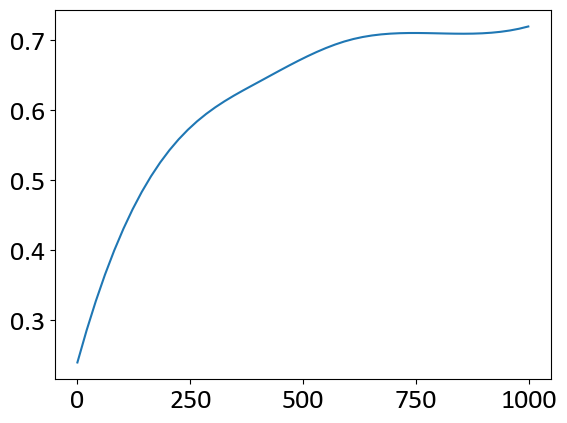

In [70]:
x = np.array([0, 1, 2, 3, 4, 5]) * 200

y = np.array([0.24, 0.54, 0.64, 0.70, 0.71, 0.72])

f = interp1d(x, y, kind='cubic')
x_new = np.linspace(0, 999, 50)
y_new = f(x_new)

plt.plot(x_new, y_new)
plt.show()

In [78]:
for i in range(y_stage_1.shape[0]):
    y_stage_3_2[i] = triangular(y_new, noise_min=-0.2, noise_max=0.05, noise_mode=-0.1)

(50, 5)
(50, 5)


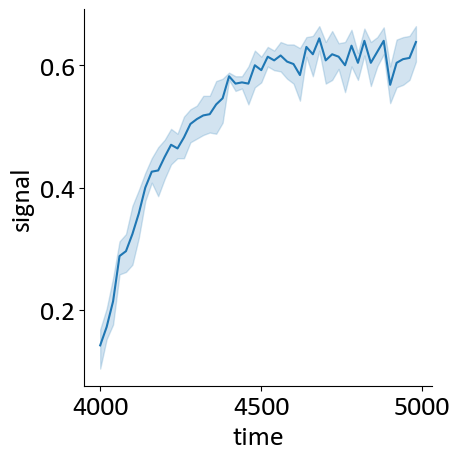

In [79]:
x = x_stage_3_2
data = y_stage_3_2.T

print(data.shape)

x_array = x
for i in range(4):
    x_array = np.column_stack((x_array, x))
print(x_array.shape)

# 将 time 和 signal 平铺为两列数据，且一一对应
x_array = x_array.flatten()  # (630,)
data = data.flatten()  # (630,)
data = np.column_stack((x_array, data))  # (630,2)
df = pd.DataFrame(data, columns=['time', 'signal'])


sns.relplot(x='time', y='signal', data=df, kind='line')
plt.show()

(200,)
(200, 5)


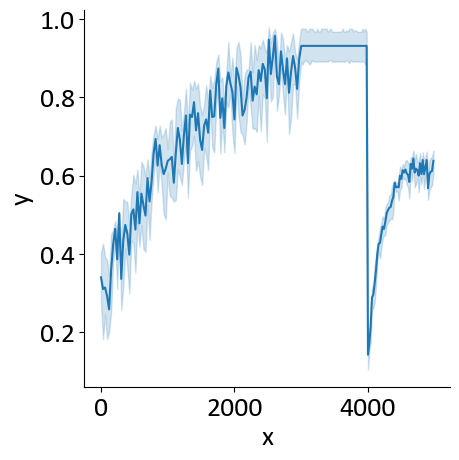

In [80]:
x = np.concatenate((x_stage_1, x_stage_2, x_stage_3_2))

y = np.empty((5, x.shape[0]))
for i in range(5):
    y[i] = np.concatenate((y_stage_1[i], y_stage_2[i], y_stage_3_2[i]))
data = y.T

print(x.shape)

x_array = x
for i in range(4):
    x_array = np.column_stack((x_array, x))
print(x_array.shape)

x_array = x_array.flatten()  # (630,)
data = data.flatten()  # (630,)
data = np.column_stack((x_array, data))  # (630,2)
df = pd.DataFrame(data, columns=['x', 'y'])

sns.relplot(x='x', y='y', data=df, kind='line')
plt.show()


In [81]:
df.to_csv("./ablation_acc_3.csv")

In [42]:
x_asr_stage_1 = x_stage_1.copy()
x_asr_stage_2 = x_stage_2.copy()
x_asr_stage_3 = x_stage_3.copy()

x_stage_2.shape

(50,)

In [ ]:
x_asr_stage_3_1 = x_stage_3.copy()

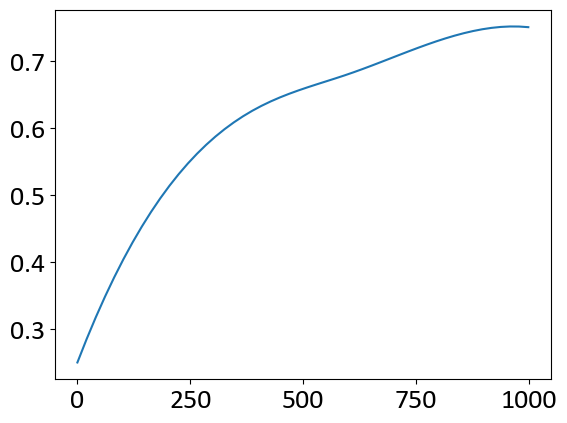

In [94]:
x = np.array([0, 1, 2, 3, 4, 5]) * 200

y = np.array([0.25, 0.51, 0.63, 0.68, 0.73, 0.75])

f = interp1d(x, y, kind='cubic')
x_new = np.linspace(0, 999, 50)
y_new = f(x_new)

plt.plot(x_new, y_new)
plt.show()


(50, 5)


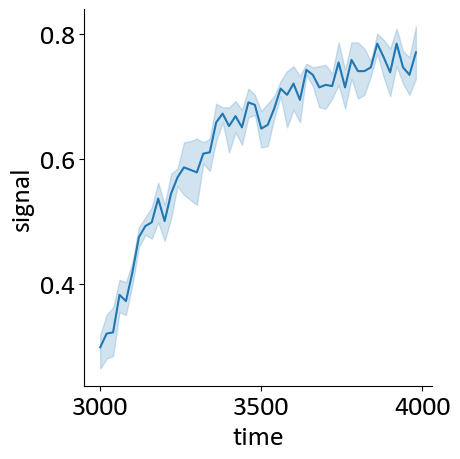

In [95]:
ys = []
for i in range(5):
    y_new_r = triangular(y_new, noise_min=-0.1, noise_max=0.1, noise_mode=0.05)
    ys.append(y_new_r)

ys = np.array(ys)

# ys.shape
x = x_asr_stage_2
data = ys.T

x_array = x
for i in range(4):
    x_array = np.column_stack((x_array, x))
print(x_array.shape)

# 将 time 和 signal 平铺为两列数据，且一一对应
x_array = x_array.flatten()  # (630,)
data = data.flatten()  # (630,)
data = np.column_stack((x_array, data))  # (630,2)
df = pd.DataFrame(data, columns=['time', 'signal'])

sns.relplot(x='time', y='signal', data=df, kind='line')
plt.show()

In [ ]:
x = np.concatenate((x_stage_1, x_stage_2, x_stage_3_2))

y = np.empty((5, x.shape[0]))
for i in range(5):
    y[i] = np.concatenate((y_))
data = y.T

print(x.shape)

x_array = x
for i in range(4):
    x_array = np.column_stack((x_array, x))
print(x_array.shape)

x_array = x_array.flatten()  # (630,)
data = data.flatten()  # (630,)
data = np.column_stack((x_array, data))  # (630,2)
df = pd.DataFrame(data, columns=['x', 'y'])

sns.relplot(x='x', y='y', data=df, kind='line')
plt.show()


In [43]:
y_asr_stage_1 = np.zeros((5, x_asr_stage_1.shape[0]))

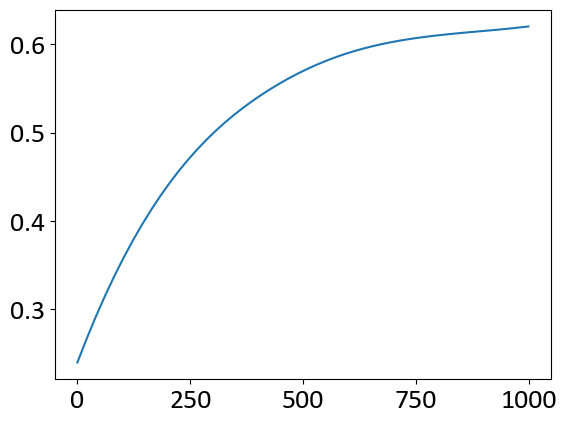

In [125]:
x = np.array([0, 1, 2, 3, 4, 5]) * 200

y = np.array([0.24, 0.44, 0.54, 0.59, 0.61, 0.62])

f = interp1d(x, y, kind='cubic')
x_new = np.linspace(0, 999, 50)
y_new = f(x_new)

plt.plot(x_new, y_new)
plt.show()

In [126]:
ys = []
for i in range(5):
    y_new_r = triangular(y_new, noise_min=-0.1, noise_max=0.1, noise_mode=0.05)
    ys.append(y_new_r)

ys = np.array(ys)

In [127]:
x = np.concatenate((x_asr_stage_2, x_asr_stage_3))

y = np.empty((5, x.shape[0]))
for i in range(5):
    y[i] = np.concatenate((y_asr_stage_2[i], ys[i]))

(100, 5)


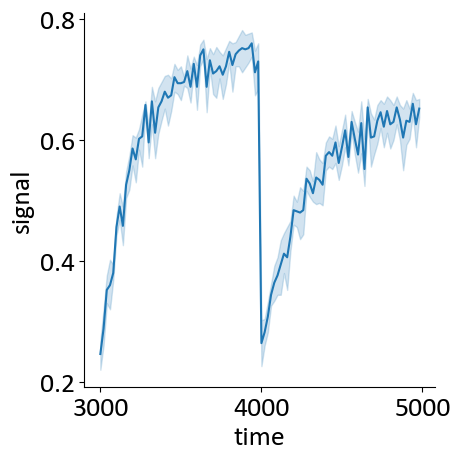

In [128]:
# x = x_asr_stage_2
# y = y_asr_stage_2

data = y.T

x_array = x
for i in range(4):
    x_array = np.column_stack((x_array, x))
print(x_array.shape)

# 将 time 和 signal 平铺为两列数据，且一一对应
x_array = x_array.flatten()  # (630,)
data = data.flatten()  # (630,)
data = np.column_stack((x_array, data))  # (630,2)
df = pd.DataFrame(data, columns=['time', 'signal'])

sns.relplot(x='time', y='signal', data=df, kind='line')
plt.show()

In [129]:
df.to_csv('./ablation_asr_3.csv')

In [50]:
y_asr_stage_2 = ys.copy()

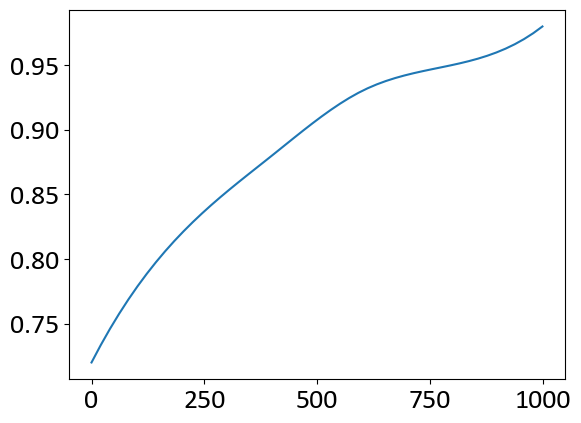

In [51]:
x = np.array([0, 1, 2, 3, 4, 5]) * 200

y = np.array([0.72, 0.82, 0.88, 0.93, 0.95, 0.98])

f = interp1d(x, y, kind='cubic')
x_new = np.linspace(0, 999, 50)
y_new = f(x_new)

plt.plot(x_new, y_new)
plt.show()


In [52]:
ys = []
for i in range(5):
    y_new_r = triangular(y_new, noise_min=-0.1, noise_max=0.1, noise_mode=0.05)
    ys.append(y_new_r)

ys = np.array(ys)

(50, 5)


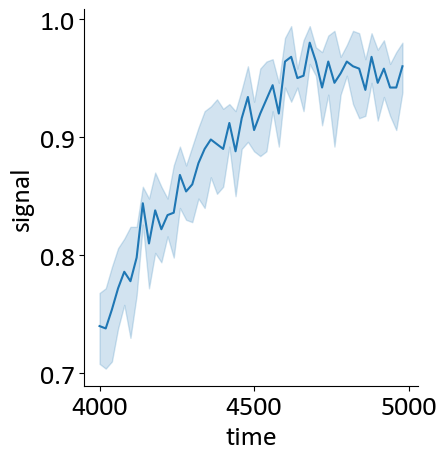

In [53]:
x = x_asr_stage_3
data = ys.T

x_array = x
for i in range(4):
    x_array = np.column_stack((x_array, x))
print(x_array.shape)

# 将 time 和 signal 平铺为两列数据，且一一对应
x_array = x_array.flatten()  # (630,)
data = data.flatten()  # (630,)
data = np.column_stack((x_array, data))  # (630,2)
df = pd.DataFrame(data, columns=['time', 'signal'])

sns.relplot(x='time', y='signal', data=df, kind='line')
plt.show()

In [54]:
y_asr_stage_3 = ys.copy()

(100,)
(100, 5)


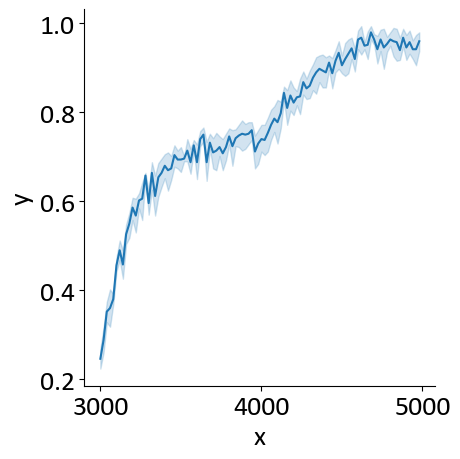

In [55]:
x = np.concatenate((x_asr_stage_2, x_asr_stage_3))

y = np.empty((5, x.shape[0]))
for i in range(5):
    y[i] = np.concatenate((y_asr_stage_2[i], y_asr_stage_3[i]))
data = y.T

print(x.shape)

x_array = x
for i in range(4):
    x_array = np.column_stack((x_array, x))
print(x_array.shape)

x_array = x_array.flatten()  # (630,)
data = data.flatten()  # (630,)
data = np.column_stack((x_array, data))  # (630,2)
df = pd.DataFrame(data, columns=['x', 'y'])

sns.relplot(x='x', y='y', data=df, kind='line')
plt.show()

In [56]:
df.to_csv("./ablation_asr.csv")

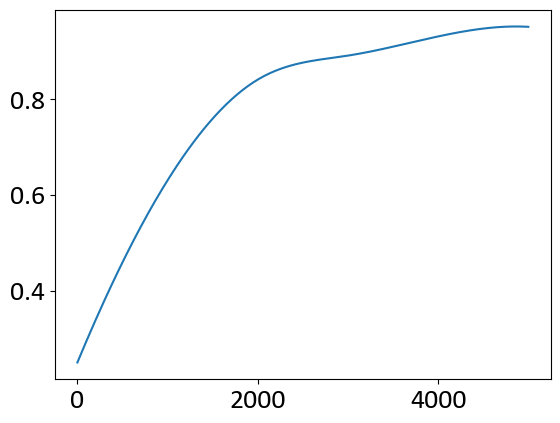

In [61]:
x = np.array([0, 1, 2, 3, 4, 5]) * 1000

y = np.array([0.25, 0.63, 0.84, 0.89, 0.93, 0.95])

f = interp1d(x, y, kind='cubic')
x_new = np.linspace(0, 4999, 250)
y_new = f(x_new)

plt.plot(x_new, y_new)
plt.show()


(250, 5)


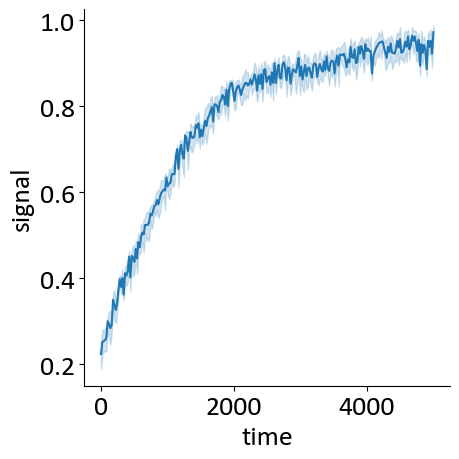

In [62]:
ys = []
for i in range(5):
    y_new_r = triangular(y_new, noise_min=-0.1, noise_max=0.1, noise_mode=0)
    ys.append(y_new_r)

ys = np.array(ys)
x = x_new
data = ys.T

x_array = x
for i in range(4):
    x_array = np.column_stack((x_array, x))
print(x_array.shape)

# 将 time 和 signal 平铺为两列数据，且一一对应
x_array = x_array.flatten()  # (630,)
data = data.flatten()  # (630,)
data = np.column_stack((x_array, data))  # (630,2)
df = pd.DataFrame(data, columns=['time', 'signal'])

sns.relplot(x='time', y='signal', data=df, kind='line')
plt.show()

In [64]:
df.to_csv('./ablation_asr_2.csv')

In [700]:
x = np.concatenate((x_stage_1, x_stage_2, x_stage_3))
x.shape

(200,)

In [186]:
acc = pd.read_csv('./acc.csv')
asr = pd.read_csv('./asr.csv')

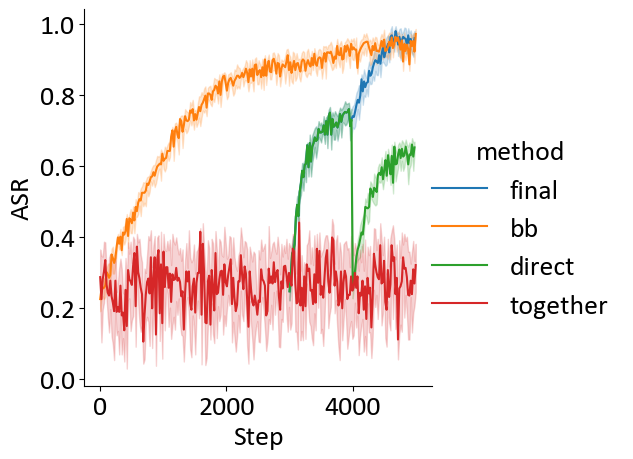

In [172]:
sns.relplot(x='Step', y='ASR',hue="method", data=asr, kind='line')

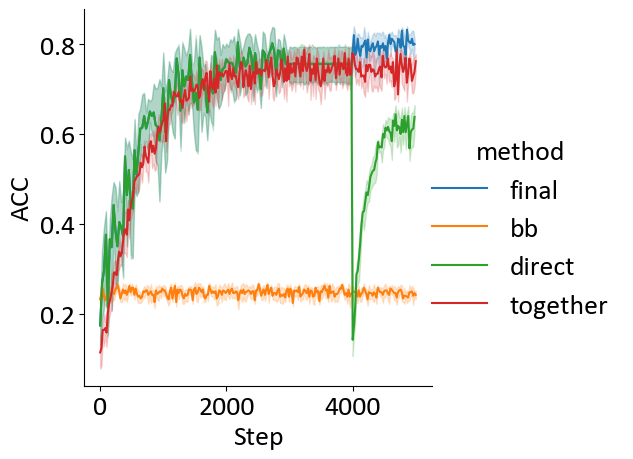

In [187]:
sns.relplot(x='Step', y='ACC',hue="method", data=acc, kind='line')

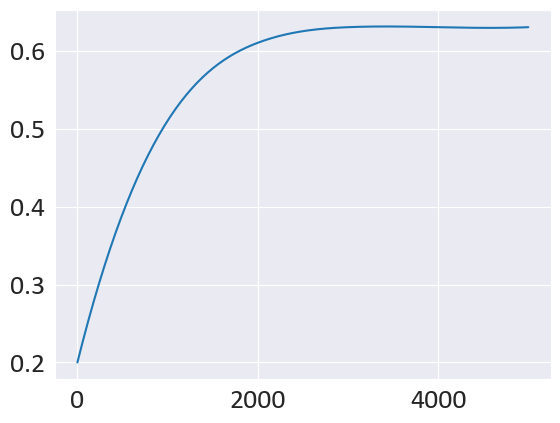

In [3]:
x = np.array([0, 1, 2, 3, 4, 5]) * 1000

y = np.array([0.2, 0.51, 0.61, 0.63, 0.63, 0.63])

f = interp1d(x, y, kind='cubic')
x_new = np.linspace(0, 4999, 250)
y_new = f(x_new)

plt.plot(x_new, y_new)
plt.show()

(250, 5)


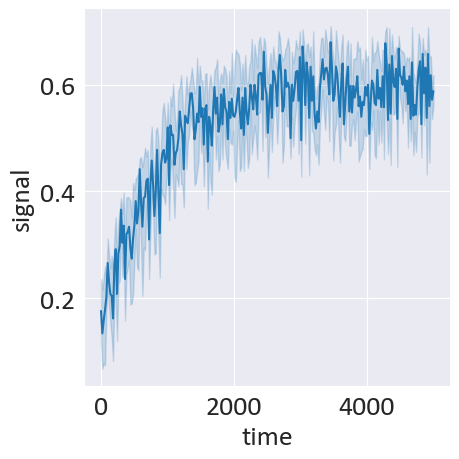

In [4]:
ys = []
for i in range(5):
    y_new_r = triangular(y_new, noise_min=-0.3, noise_max=0.2, noise_mode=0)
    ys.append(y_new_r)

ys = np.array(ys)
x = x_new
data = ys.T

x_array = x
for i in range(4):
    x_array = np.column_stack((x_array, x))
print(x_array.shape)

# 将 time 和 signal 平铺为两列数据，且一一对应
x_array = x_array.flatten()  # (630,)
data = data.flatten()  # (630,)
data = np.column_stack((x_array, data))  # (630,2)
df = pd.DataFrame(data, columns=['time', 'signal'])

sns.relplot(x='time', y='signal', data=df, kind='line')
plt.show()

In [5]:
df.to_csv('./ablation_acc_4.csv')